In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

from matplotlib import pyplot as plt

In [ ]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


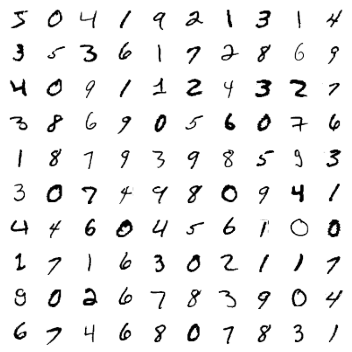

In [ ]:
plt.figure(figsize=(5, 5))

for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(X_train[i], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
X_train_L = X_train.reshape(60000, 784).astype('float32')
X_valid_L = X_valid.reshape(10000, 784).astype('float32')

In [ ]:
X_train_L /= 255
X_valid_L /= 255

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)

In [ ]:
model = Sequential()
model.add(Dense(800, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.fit(X_train_L, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid_L, y_valid))

Epoch 1/200
469/469 [==============================] - 5s 10ms/step - loss: 0.0914 - accuracy: 0.0716 - val_loss: 0.0901 - val_accuracy: 0.1384
Epoch 2/200
469/469 [==============================] - 4s 10ms/step - loss: 0.0897 - accuracy: 0.1769 - val_loss: 0.0893 - val_accuracy: 0.2123
Epoch 3/200
469/469 [==============================] - 5s 10ms/step - loss: 0.0891 - accuracy: 0.2299 - val_loss: 0.0888 - val_accuracy: 0.2545
Epoch 4/200
469/469 [==============================] - 4s 10ms/step - loss: 0.0886 - accuracy: 0.2673 - val_loss: 0.0884 - val_accuracy: 0.2775
Epoch 5/200
469/469 [==============================] - 4s 9ms/step - loss: 0.0882 - accuracy: 0.2914 - val_loss: 0.0880 - val_accuracy: 0.3103
Epoch 6/200
469/469 [==============================] - 4s 9ms/step - loss: 0.0877 - accuracy: 0.3187 - val_loss: 0.0875 - val_accuracy: 0.3302
Epoch 7/200
469/469 [==============================] - 4s 9ms/step - loss: 0.0873 - accuracy: 0.3318 - val_loss: 0.0870 - val_accuracy: 0.

In [ ]:
with open('model_params.json', 'w') as f:
    f.write(model.to_json())

model.save_weights('model_weigths.h5')